In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from PIL import Image

In [19]:
img = mpimg.imread('ROI-002.jpg')
print(img.shape)

(81, 83, 3)


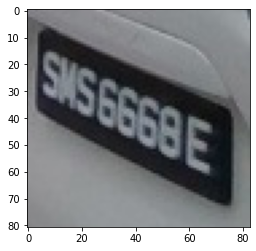

In [20]:
imgplot = plt.imshow(img)


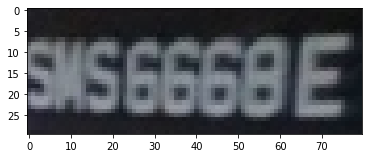

In [47]:
rows, cols = img.shape[:2]
pts_o = np.float32([[8, 8], [70, 38], [5, 38], [72, 68]]) # 这四个点为原始图片上数独的位置
pts_d = np.float32([[0, 0], [80, 0], [0, 30], [80, 30]]) # 这是变换之后的图上四个点的位置
M = cv2.getPerspectiveTransform(pts_o, pts_d)
correct_plate = cv2.warpPerspective(img, M, (80,30))
plt.imshow(correct_plate)

(500, 558, 3)


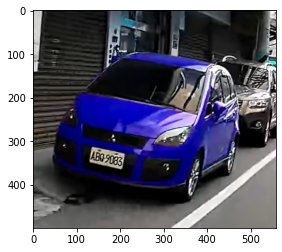

In [22]:
car = cv2.imread('31.png')
print(car.shape)
plt.imshow(car)

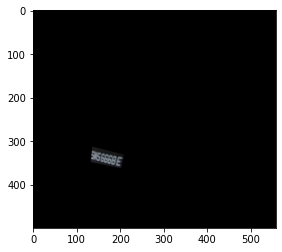

In [48]:
tmp_plate = cv2.resize(correct_plate, (558,500))
pt_o = np.float32([[0, 0], [558, 0], [0, 500], [558, 500]]) # 这四个点为原始图片上数独的位置
pt_d = np.float32([[136, 313], [209,331 ], [132, 348], [202, 363]]) # 这是变换之后的图上四个点的位置
M_t = cv2.getPerspectiveTransform(pt_o, pt_d)
car_plate = cv2.warpPerspective(tmp_plate, M_t, (558,500)) # 最后一参数是输出dst的尺寸。可以和原来图片尺寸不一致。按需求来确定
plt.imshow(car_plate)

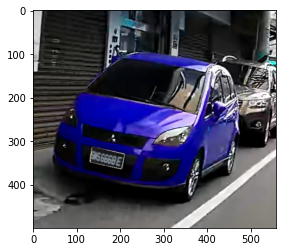

In [49]:
tmp_car=car
for i in range(500):
    for j in range(558):
        if car_plate[i][j].all()!=False:
            tmp_car[i][j]=car_plate[i][j]
plt.imshow(tmp_car)